In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataFile="hip1000.txt"
data=np.loadtxt("mouse-data/"+dataFile,delimiter=",")
data.shape

#208 rows representing mice
data.shape

(208, 879)

In [103]:
dataFile="hip1000names.txt"
names=np.loadtxt("mouse-data/"+dataFile,dtype='str',delimiter=",")
names.shape

#879 genes (cols)

(879,)

In [18]:
data

array([[-1.33958036,  2.44677752, -0.41485243, ..., -0.63151539,
         0.19854157, -1.41151727],
       [ 1.939029  ,  2.37432889, -1.29699029, ...,  0.92782177,
        -0.12240643,  0.2869572 ],
       [ 0.7944613 ,  0.2011286 ,  0.31727608, ..., -0.51607517,
         0.55774904,  0.07078217],
       ...,
       [-0.8290766 , -0.61092632,  0.0458242 , ..., -0.17617712,
         0.36481081, -2.10622735],
       [-0.38669499, -0.16403787,  1.67850987, ..., -1.39204491,
         0.44528088, -0.30127181],
       [-0.03591875,  1.46837022,  0.23776187, ..., -0.87248532,
        -1.08187909, -0.69468496]])

In [96]:
mean=np.loadtxt("test_madison.txt")
mean.shape
mean[:,1]

array([4., 2.])

In [23]:
a=[1,2,3]
b=[1,2,3]
a==b

True

In [25]:
len(data[0])

879

In [27]:
len(mean[0])

3

In [28]:
np.argmin(a)

0

In [32]:
len(data[:,0])

208

In [34]:
len(data[:,0])

208

In [93]:
len(mean[0,:])

3

In [83]:
def UpdateMeans(cluster_labels, data,k):
    #initialize a 208xk matrix of zeroes
    means=np.zeros([len(data[:,0]),k])
    #initialize a counter vector 
    counter=np.zeros([k])

    for i in range(len(cluster_labels)):
        idx=cluster_labels[i]
        means[:,idx]+=data[:,i]
        counter[idx]+=1

    #normalize
    for i in range(k):
        means[:,i]/=counter[i]

    return means

In [74]:
def GenerateClusters(data,means):
    #take euclidian distance from each point to each of the means 
    #assign it to the minimum
    clusters=[]
    #loop through data points
    for i in  range(len(data[0])):
        distToMeans=[]
        #loop through the means
        for j in range(len(means[0])):
            dist=EuclidianDist(data[:,i],means[:,j])
            distToMeans.append(dist)   
        #get index of the minimum entry of distToMeans
        clusters.append(np.argmin(distToMeans))
    return clusters

NameError: name 'EuclidianDist' is not defined

In [68]:
def EuclidianDist(a,b):
    dist = np.linalg.norm(a - b)
    return dist
   

In [79]:
clusters=GenerateClusters(data,mean)

In [70]:
print(EuclidianDist(mean[:,0],data[:,0]))

14.589513700798797


In [84]:
UpdateMeans(clusters, data,3)

array([[ 9.81798663e-01, -1.30536502e+00, -9.42199281e-02],
       [-4.81207531e-01,  4.04001763e-01,  6.36426494e-02],
       [ 4.14889309e-01,  4.22483274e-01, -7.27259535e-02],
       [ 1.27962306e+00, -1.05609039e+00, -2.84417007e-01],
       [ 1.02407925e+00, -6.42277221e-01, -2.60526816e-01],
       [-1.59340399e-01,  4.14831519e-01, -1.40199443e-01],
       [ 3.20569534e-02, -7.04312498e-02,  8.02428059e-02],
       [ 2.13000859e-01,  5.06846749e-02, -3.37470018e-01],
       [-5.81515796e-02,  9.86075613e-02,  3.38911277e-02],
       [-5.78179657e-02,  4.94912589e-02, -8.70409081e-03],
       [ 6.07378820e-01,  1.37469047e-01, -2.37656393e-01],
       [-2.50837720e-01,  2.19813073e-01, -3.47884638e-01],
       [-2.79777800e-01, -2.99140218e-01, -4.27837073e-02],
       [-2.55115779e-01,  1.61756060e-01, -5.38286340e-02],
       [ 7.50331026e-01,  4.99103271e-02, -1.99257177e-01],
       [ 4.84592403e-01,  3.52020551e-01, -3.26362098e-01],
       [ 4.30145537e-02,  1.50887867e-01

In [82]:
counter=np.zeros([3])
print(counter)

[0. 0. 0.]


In [102]:
for i in range(2):
    print(mean[:,i])

[0. 2.]
[4. 2.]


In [106]:
import random
numGenes=len(data[0,:])
k=3
indices=random.sample(range(numGenes),k)

In [107]:
indices

[242, 620, 484]

In [122]:
numMice=len(data[:,0])
print(numMice)
means=np.zeros(shape=(numMice,k))
print(len(my_data[:,0]))
for i in range(k):
    means[:,i]=data[:,indices[i]]
print(means)

208
208
[[-1.77978908e+00  1.95743603e+00 -1.58646080e+00]
 [ 1.35535218e-02 -1.21398237e+00 -6.89219245e-01]
 [ 1.90608911e+00  5.84136595e-01  2.17032846e-01]
 [-1.01974221e+00  1.86433112e+00 -1.34609490e+00]
 [-1.65563334e+00  1.25427305e+00 -7.59205957e-01]
 [ 4.11998799e-01 -3.52959727e-01  1.64874356e+00]
 [-1.03369714e+00  2.11582266e-01 -1.04378493e+00]
 [ 1.55070483e-01  1.14096548e+00 -7.89042419e-01]
 [ 2.21682620e-01 -6.65143355e-01  2.90741833e-01]
 [-1.71269245e-02 -4.83297353e-01  7.62856973e-02]
 [-2.05850420e-01  1.13623432e+00  1.12963940e+00]
 [-8.21706516e-01 -7.36612234e-02  1.24237110e+00]
 [-3.84521002e-01 -6.38889080e-01 -9.44448272e-01]
 [ 1.48179527e-01  3.09890511e-01  9.53897646e-01]
 [ 7.21215743e-01  2.54859096e-01  8.00668082e-01]
 [ 1.28676476e+00  6.36601815e-01  2.88167652e-01]
 [-4.77497617e-01  1.11963561e+00  5.08389784e-01]
 [ 5.36812978e-01 -4.94256329e-01  1.03779048e+00]
 [-4.95285526e-01 -5.85495384e-01  6.47093864e-01]
 [-2.30082798e-02  9.84

In [109]:
f=np.zeros()

TypeError: zeros() missing required argument 'shape' (pos 0)

In [123]:
for i in range(5):
    indices=random.sample(range(numGenes),k)
    print(indices)

[53, 497, 715]
[797, 678, 687]
[466, 426, 510]
[76, 831, 407]
[725, 679, 376]


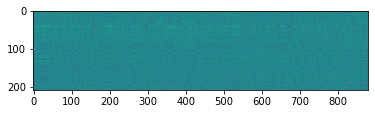

In [125]:
plt.imshow(data)

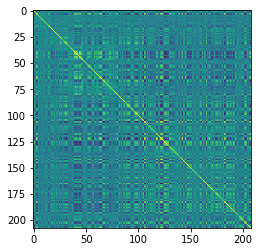

In [128]:
#correlation matrix
rho=np.corrcoef(data)
before=plt.imshow(rho)

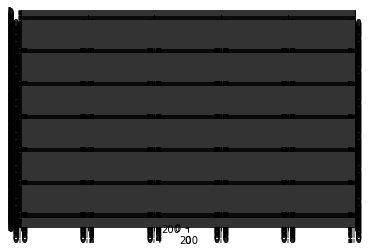

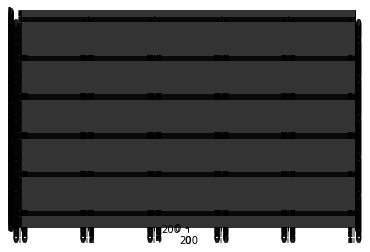

In [134]:
plt.subplots(211)
plt.imshow(rho)
plt.subplots(212)
plt.imshow(rho)

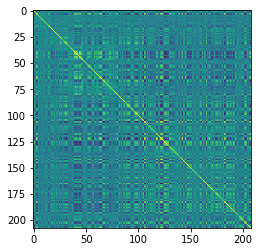

In [133]:
plt.imshow(rho)

In [135]:
from __future__ import print_function
import numpy as np

def valid_imshow_data(data):
    data = np.asarray(data)
    if data.ndim == 2:
        return True
    elif data.ndim == 3:
        if 3 <= data.shape[2] <= 4:
            return True
        else:
            print('The "data" has 3 dimensions but the last dimension '
                  'must have a length of 3 (RGB) or 4 (RGBA), not "{}".'
                  ''.format(data.shape[2]))
            return False
    else:
        print('To visualize an image the data must be 2 dimensional or '
              '3 dimensional, not "{}".'
              ''.format(data.ndim))
        return False

In [136]:
valid_imshow_data(rho)

True

In [145]:
ordered=np.empty((numMice))

In [144]:
ordered=np.append(ordered,data[:,0], axis=0)

In [140]:
data[:,0].shape

(208,)

In [146]:
ordered.shape

(0, 208)

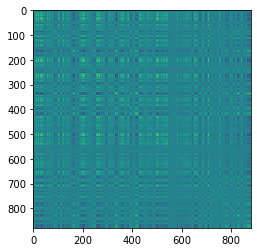

In [149]:
f=data.transpose()
rho=np.corrcoef(f)
before=plt.imshow(rho)

In [150]:
rho.shape

(879, 879)